<a href="https://colab.research.google.com/github/afif-af/ml_pytorch_scikitlearn/blob/main/Chapter04ml_pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [521]:
import pandas as pd
from io import StringIO


In [522]:
csv_data=\
'''A,B,C,D
1.0,2.0,3.0,4.0
5.0,6.0,,8.0
10.0,11.0,12.0'''

In [523]:
df=pd.read_csv(StringIO(csv_data))
df

,A,B,C,D
0,1.0,2.0,3.0,4.0
1,5.0,6.0,NaN,8.0
2,10.0,11.0,12.0,NaN


In [524]:
df.isnull().sum()

,0
A,0
B,0
C,1
D,1


In [525]:
df.values

array([[ 1.,  2.,  3.,  4.],
       [ 5.,  6., nan,  8.],
       [10., 11., 12., nan]])

In [526]:
df.dropna(axis=0)

,A,B,C,D
0,1.0,2.0,3.0,4.0


In [527]:
df.dropna(axis=1)

,A,B
0,1.0,2.0
1,5.0,6.0
2,10.0,11.0


In [528]:
df.dropna(how='all')

,A,B,C,D
0,1.0,2.0,3.0,4.0
1,5.0,6.0,NaN,8.0
2,10.0,11.0,12.0,NaN


In [529]:
df.dropna(thresh=4)

,A,B,C,D
0,1.0,2.0,3.0,4.0


In [530]:
df.dropna(subset=['C'])

,A,B,C,D
0,1.0,2.0,3.0,4.0
2,10.0,11.0,12.0,NaN


In [531]:
from sklearn.impute import SimpleImputer
import numpy as np

In [532]:
imr= SimpleImputer(missing_values=np.nan, strategy='mean')
imr=imr.fit(df.values)
imputed_data=imr.transform(df.values)
imputed_data

array([[ 1. ,  2. ,  3. ,  4. ],
       [ 5. ,  6. ,  7.5,  8. ],
       [10. , 11. , 12. ,  6. ]])

In [533]:
df.fillna(df.mean())

,A,B,C,D
0,1.0,2.0,3.0,4.0
1,5.0,6.0,7.5,8.0
2,10.0,11.0,12.0,6.0


In [534]:
import pandas as pd
df=pd.DataFrame([
    ['green','M',10.1,'class2'],
    ['red','L',13.5,'class1'],
    ['blue','XL', 15.3,'class2']
])

In [535]:
df.columns=['color','size','price','classlabel']

In [536]:
df

,color,size,price,classlabel
0,green,M,10.1,class2
1,red,L,13.5,class1
2,blue,XL,15.3,class2


In [537]:
size_mapping={
    'XL':3,
    'L':2,
    'M':1
}

In [538]:
df['size']=df['size'].map(size_mapping)

In [539]:
df

,color,size,price,classlabel
0,green,1,10.1,class2
1,red,2,13.5,class1
2,blue,3,15.3,class2


In [540]:
inv_size_mapping={v: k for k, v in size_mapping.items()}
df['size'].map(inv_size_mapping)

,size
0,M
1,L
2,XL


In [541]:
import numpy as np
class_mapping={label:idx for idx, label in
               enumerate (np.unique(df['classlabel']))}
class_mapping

{'class1': 0, 'class2': 1}

In [542]:
df['classlabel']=df['classlabel'].map(class_mapping)

In [543]:
df

,color,size,price,classlabel
0,green,1,10.1,1
1,red,2,13.5,0
2,blue,3,15.3,1


In [544]:
inv_class_mapping={v: k for k, v in class_mapping.items()}
df['classlabel']=df['classlabel'].map(inv_class_mapping)
df

,color,size,price,classlabel
0,green,1,10.1,class2
1,red,2,13.5,class1
2,blue,3,15.3,class2


In [545]:
from sklearn.preprocessing import LabelEncoder
class_le=LabelEncoder()
y=class_le.fit_transform(df['classlabel'].values)
y

array([1, 0, 1])

In [546]:
class_le.inverse_transform(y)

array(['class2', 'class1', 'class2'], dtype=object)

In [547]:
x=df[['color','size','price']].values
color_le=LabelEncoder()
x[:,0]=color_le.fit_transform(x[:, 0])
x

array([[1, 1, 10.1],
       [2, 2, 13.5],
       [0, 3, 15.3]], dtype=object)

In [548]:
from sklearn.preprocessing import OneHotEncoder
x=df[['color','size','price']].values
color_ohe=OneHotEncoder()
color_ohe.fit_transform(x[:,0].reshape(-1,1)).toarray()

array([[0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.]])

In [549]:
from sklearn.compose import ColumnTransformer
x=df[['color','size','price']].values
c_transf=ColumnTransformer([
    ('onehot', OneHotEncoder(),[0]),
    ('nothing','passthrough',[1,2])
    ])

In [550]:
c_transf.fit_transform(x).astype(float)

array([[ 0. ,  1. ,  0. ,  1. , 10.1],
       [ 0. ,  0. ,  1. ,  2. , 13.5],
       [ 1. ,  0. ,  0. ,  3. , 15.3]])

In [551]:
pd.get_dummies(df[['color','size','price']])

,size,price,color_blue,color_green,color_red
0,1,10.1,False,True,False
1,2,13.5,False,False,True
2,3,15.3,True,False,False


In [552]:
pd.get_dummies(df[['color','size','price']], drop_first=True)

,size,price,color_green,color_red
0,1,10.1,True,False
1,2,13.5,False,True
2,3,15.3,False,False


In [553]:
color_ohe=OneHotEncoder(categories='auto', drop='first')
c_transf=ColumnTransformer([
    ('onehot', color_ohe,[0]),
    ('nothing', 'passthrough',[1,2])
])

In [554]:
c_transf.fit_transform(x).astype(float)

array([[ 1. ,  0. ,  1. , 10.1],
       [ 0. ,  1. ,  2. , 13.5],
       [ 0. ,  0. ,  3. , 15.3]])

In [555]:
df=pd.DataFrame([['green','M',10.1,'class2'],
                 ['red','L',13.5,'class1'],
                 ['blue','XL',15.3,'class2']])
df.columns=['colors','size','price','classlabel']
df

,colors,size,price,classlabel
0,green,M,10.1,class2
1,red,L,13.5,class1
2,blue,XL,15.3,class2


In [556]:
df['x>M']=df['size'].apply(
    lambda x: 1 if x in {'L', 'XL'} else 0
)
df['x>L']=df['size'].apply(
    lambda x: 1 if x=='XL' else 0
)

In [557]:
del df['size']
df

,colors,price,classlabel,x>M,x>L
0,green,10.1,class2,0,0
1,red,13.5,class1,1,0
2,blue,15.3,class2,1,1


In [558]:
df_wine =pd.read_csv(
    'https://archive.ics.uci.edu/ml/'
    'machine-learning-databases/wine/wine.data',
    header=None
)

In [559]:
df_wine.columns=['Class label','Alcohol','Malic acid','Ash','Alcalinity of ash','Magnesium',
         'Total phenols','Flavanoids','Nonflavanoid phenols','Proanthocyanins','Color intensity','Hue','OD280/OD315 of diluted wines',
         'Proline']
print('Class label',np.unique(df_wine['Class label']))

Class label [1 2 3]


In [560]:
df_wine.head()

,Class label,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [561]:
from sklearn.model_selection import train_test_split

In [562]:
x,y=df_wine.iloc[:,1].values, df_wine.iloc[:,0].values
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3, random_state=0,stratify=y)

In [563]:
from sklearn.preprocessing import MinMaxScaler
mms=MinMaxScaler()
x_train = x_train.reshape(-1, 1)
x_test = x_test.reshape(-1, 1)

x_train_norm=mms.fit_transform(x_train)
x_test_norm=mms.transform(x_test)

In [564]:
ex=np.array([0, 1,2,3,4,5])
print('standardized:', (ex-ex.mean())/ex.std()
)

standardized: [-1.46385011 -0.87831007 -0.29277002  0.29277002  0.87831007  1.46385011]


In [565]:
print('normalized:', (ex-ex.min())/ex.max()-ex.min())

normalized: [0.  0.2 0.4 0.6 0.8 1. ]


In [566]:
from sklearn.preprocessing import StandardScaler
stdsc = StandardScaler()
x_train = x_train.reshape(-1, 1)
x_test = x_test.reshape(-1, 1)

x_train_std=stdsc.fit_transform(x_train)
x_test_std=stdsc.transform(x_test)

In [567]:
from sklearn.linear_model import LogisticRegression
LogisticRegression(penalty='l1',
                   solver='liblinear',
                   multi_class='ovr')

LogisticRegression(multi_class='ovr', penalty='l1', solver='liblinear')

In [568]:
lr=LogisticRegression(penalty='l1',
                      C=1.0,
                      solver='liblinear',
                      multi_class='ovr')
lr.fit(x_train_std, y_train)
print('trainning accuracy: ',lr.score(x_train_std, y_train))


trainning accuracy:  0.6774193548387096


In [569]:
print('test accuracy:',lr.score(x_test_std,y_test))

test accuracy: 0.6481481481481481


In [570]:
lr.intercept_

array([-1.27118491, -0.67502386, -0.98528174])

In [571]:
lr.coef_

array([[ 2.14500932],
       [-2.42192906],
       [ 0.22908302]])

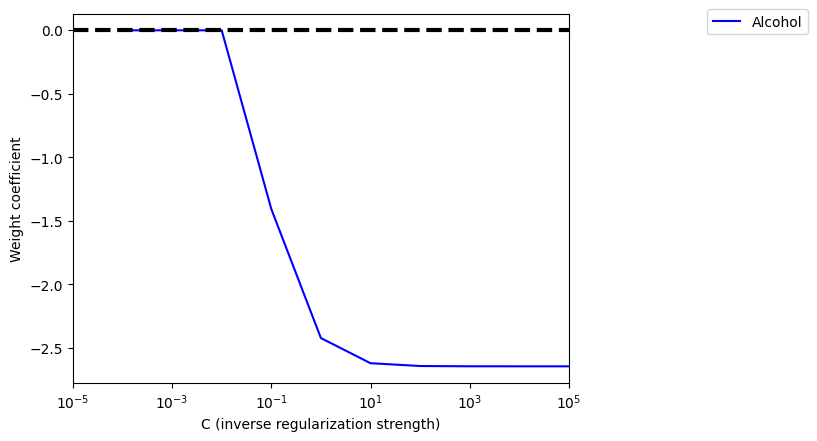

In [572]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = plt.subplot(111)
colors = ['blue', 'green', 'red', 'cyan',
 'magenta', 'yellow', 'black',
 'pink', 'lightgreen', 'lightblue',
 'gray', 'indigo', 'orange']
weights, params = [], []
for c in np.arange(-4., 6.):
  lr = LogisticRegression(penalty='l1', C=10.**c,
  solver='liblinear',
  multi_class='ovr', random_state=0)
  lr.fit(x_train_std, y_train)
  weights.append(lr.coef_[1])
  params.append(10**c)


weights = np.array(weights)
for column, color in zip(range(weights.shape[1]), colors):
    plt.plot(params, weights[:, column],
    label=df_wine.columns[column + 1],
    color=color)
plt.axhline(0, color='black', linestyle='--', linewidth=3)
plt.xlim([10**(-5), 10**5])
plt.ylabel('Weight coefficient')
plt.xlabel('C (inverse regularization strength)')
plt.xscale('log')
plt.legend(loc='upper left')
ax.legend(loc='upper center',
          bbox_to_anchor=(1.38, 1.03),
          ncol=1, fancybox=True)
plt.show()

In [573]:
from sklearn.base import clone
from itertools import combinations
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [574]:
class SBS():
  def __init__(self,estimator, k_features,
               scoring=accuracy_score,
               test_size=0.25, random_state=1):
    self.scoring=scoring
    self.estimator=clone(estimator)
    self.k_features=k_features
    self.test_size=test_size
    self.random_state=random_state

  def fit(self, x, y):
    x_train,x_test,y_train,y_test= \
          train_test_split(x,y,test_size=self.test_size,
                            random_state=self.random_state)
    dim=x_train.shape[1]
    self.indices_=tuple(range(dim))
    self.subsets_=[self.indices_]
    score=self._calc_score(x_train, y_train,
                          x_test, y_test, self.indices_)
    self.scores_=[score]
    while dim > self.k_features:
      scores = []
      subsets = []

      for p in combinations(self.indices_,r=dim -1):
        score=self._calc_score(x_train, y_train,
                                 x_test, y_test, p)
        scores.append(score)
        subsets.append(p)

      best=np.argmax(scores)
      self.indices_=subsets[best]
      self.subsets_.append(self.indices_)
      dim-=1
      self.scores_.append(scores[best])
    self.k_score=self.scores_[-1]

    return self

  def transform(self, x):
      return x[:, self.indices_]

  def _calc_score(self, x_train, y_train, x_test, y_test, indices):
    self.estimator.fit(x_train[:, indices], y_train)
    y_pred=self.estimator.predict(x_test[:,indices])
    score=self.scoring(y_test, y_pred)
    return score



In [575]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=5)
sbs=SBS(knn, k_features=1)
sbs.fit(x_train_std,y_train)

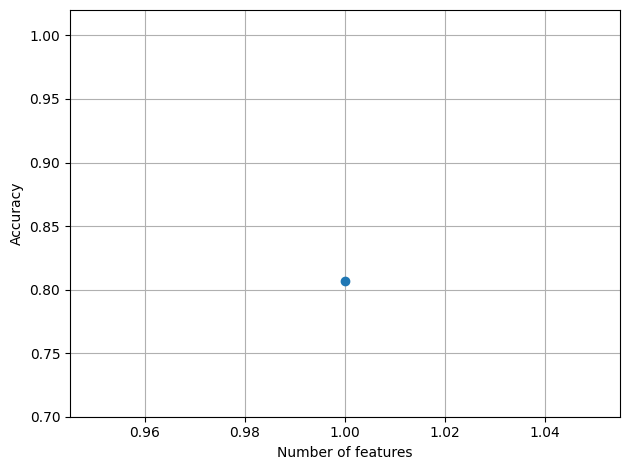

In [576]:
k_feat=[len(k) for k in sbs.subsets_]
plt.plot(k_feat, sbs.scores_, marker='o')
plt.ylim([0.7, 1.02])
plt.ylabel('Accuracy')
plt.xlabel('Number of features')
plt.grid()
plt.tight_layout()
plt.show()

In [577]:
k3 = list(sbs.subsets_[10])
print(df_wine.columns[1:][k3])

IndexError: list index out of range

In [ ]:
knn.fit(x_train_std, y_train)
print('Training accuracy:', knn.score(x_train_std, y_train))
print('Test accuracy:', knn.score(x_test_std, y_test))

In [ ]:
knn.fit(x_train_std[:,k3],y_train)
print('Training accuracy:', knn.score(x_train_std[:,k3], y_train))

In [ ]:
print('Test accuracy:', knn.score(x_test_std[:,k3], y_test))

In [ ]:
from sklearn.ensemble import RandomForestClassifier
feat_labels=df_wine.columns[1:]
forest=RandomForestClassifier(n_estimators=500,
                              random_state=1)
forest.fit(x_train.reshape(-1, 1), y_train)
importance=forest.feature_importances_
indices=np.argsort(importance)[::-1]
for f in range(x_train.shape[1]):
  print("%2d) %-*s %f " %(f+1, 30,feat_labels[indices[f]],
                                              importance[indices[f]])) # Corrected to use importance instead of importances
plt.title('Feature importance')
plt.bar(range(x_train.shape[1]),
        importance[indices],
        align='center')
plt.xticks(range(x_train.shape[1]),
           feat_labels[indices], rotation=90) # Corrected xticks
plt.xlim([-1, x_train.shape[1]])
plt.tight_layout()
plt.show()

In [ ]:
from sklearn.feature_selection import SelectFromModel
sfm=SelectFromModel(forest, threshold=0.1, prefit=True)
x_selected=sfm.transform(x_train)
print('Num of feature','criterion',x_selected.shape[1])



In [ ]:
for f in range(x_selected.shape[1]):
  print("%2d) %-*s %f" % (f+1, 30, feat_labels[indices[f]],
                          importance[indices[f]]))